# 라이브러리 불러오기

In [1]:
import os
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 랜덤 시드 설정

In [2]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# 데이터 불러오기

In [3]:
BASE_PATH = r'C:\Users\com\Documents\GitHub\level2-competitiveds-recsys-06\data\etc'

train_data = pd.read_csv(os.path.join(BASE_PATH, 'train.csv'))
test_data = pd.read_csv(os.path.join(BASE_PATH, 'test.csv'))
sample_submission = pd.read_csv(os.path.join(BASE_PATH, 'sample_submission.csv'))

In [4]:
import sys
import os

sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(""))))
from src.pre_process.feature_add import FeatureAddition
from src.pre_process.feature_duplicate import FeatureDuplication

# 데이터 EDA 수행하기

In [4]:
print("train, test_data, sample_submission shape : ", train_data.shape, test_data.shape, sample_submission.shape)
print("train data 상단 5개 정보 확인 : ", train_data.head())
print("test data 상단 5개 정보 확인 : ", test_data.head())
print("sample_submission 상단 5개 정보 확인 : ", sample_submission.head())
print('train data 변수 요약 정보 확인 : ', train_data.describe())
print("test data 변수 요약 정보 확인 : ", test_data.describe())



train, test_data, sample_submission shape :  (1801228, 11) (150172, 10) (150172, 2)
train data 상단 5개 정보 확인 :     index  area_m2  contract_year_month  contract_day  contract_type  floor  \
0      0  84.9981               201906            25              2      9   
1      1  84.9981               202003            26              2     20   
2      2  84.9981               202003            28              2      8   
3      3  59.3400               201907            15              2      1   
4      4  59.8100               201904            12              2      6   

   built_year   latitude   longitude  age  deposit  
0        2019  37.054314  127.045216    0  17000.0  
1        2019  37.054314  127.045216    1  23000.0  
2        2019  37.054314  127.045216    1  23000.0  
3        1986  36.964647  127.055847   33   5000.0  
4        1995  36.972390  127.084514   24   1800.0  
test data 상단 5개 정보 확인 :     index  area_m2  contract_year_month  contract_day  contract_type  floor  \


In [4]:
print(train_data.columns)
train_data.head()

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'age',
       'deposit'],
      dtype='object')


,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,17000.0
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,23000.0
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,23000.0
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,5000.0
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,1800.0


In [6]:
# train_data.shape #(1594362, 8)
train_data.groupby(by=["latitude", "longitude", "built_year"]).max()

,,,index,area_m2,contract_year_month,contract_day,contract_type,floor,age,deposit
latitude,longitude,built_year,,,,,,,,
36.917910,126.908029,1996,775455,84.5900,202304,28,2,14,27,10000.0
36.957089,127.047449,1990,774308,46.9800,202311,31,2,5,33,8500.0
36.959894,127.045371,2020,162840,83.2576,202103,22,2,12,1,23000.0
36.960034,127.059939,2005,774337,84.5344,202309,31,2,13,18,19000.0
36.960936,127.054219,2010,774345,179.6433,202311,20,2,8,13,37000.0
...,...,...,...,...,...,...,...,...,...,...
38.096380,127.076702,2002,790509,60.7000,202305,30,2,6,21,6500.0
38.101890,127.079581,1996,790527,84.9500,202312,31,2,13,27,9500.0
38.104768,127.079949,2023,790615,84.9986,202312,31,2,23,0,23000.0


In [7]:
# train_data.shape #(1594362, 8)
train_data.groupby(by=["contract_type"]).count()

,index,area_m2,contract_year_month,contract_day,floor,built_year,latitude,longitude,age,deposit
contract_type,,,,,,,,,,
0,559687,559687,559687,559687,559687,559687,559687,559687,559687,559687
1,314755,314755,314755,314755,314755,314755,314755,314755,314755,314755
2,926786,926786,926786,926786,926786,926786,926786,926786,926786,926786


```python
tarin_data.shape # == (1594362, 8)
train_data.contract_year_month # min = 201904 / max = 202306
area_m2 # min = 10.3215/ max 317.36
deposit # min = 300 / 1,100,000
```
24년 지어진 건물의 최소 계약일자는 21년 9월 이며 최대 계약 일은 23년 12월이다.```python
tarin_data.shape # == (1594362, 8)
train_data.contract_year_month # min = 201904 / max = 202306
area_m2 # min = 10.3215/ max 317.36
deposit # min = 300 / 1,100,000
```
24년 지어진 건물의 최소 계약일자는 21년 9월 이며 최대 계약 일은 23년 12월이다.

# 대회에 필요한 데이터만 활용하기

In [5]:
train_data["_type"] = "train"
test_data["_type"] = "test"

concat_df = pd.concat([train_data,test_data],axis=0)
df= FeatureAddition(concat_df).get_data()
df

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,_type,apt_idx,area,area_price,area_m2_price
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,17000.0,train,0,25.8,658.914729,200.004471
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,23000.0,train,0,25.8,891.472868,270.594284
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,23000.0,train,0,25.8,891.472868,270.594284
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,5000.0,train,1,18.0,277.777778,84.260195
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,1800.0,train,2,18.1,99.447514,30.095302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150167,150167,115.5101,202402,27,0,17,2010,37.528394,126.659398,14,NaN,test,17869,35.0,NaN,NaN
150168,150168,142.8738,202403,2,0,4,2010,37.528394,126.659398,14,NaN,test,17869,43.3,NaN,NaN
150169,150169,142.8738,202403,16,1,13,2010,37.528394,126.659398,14,NaN,test,17869,43.3,NaN,NaN
150170,150170,114.9285,202403,22,1,2,2010,37.528394,126.659398,14,NaN,test,17869,34.8,NaN,NaN


In [6]:
df.isnull().sum()

index                       0
area_m2                     0
contract_year_month         0
contract_day                0
contract_type               0
floor                       0
built_year                  0
latitude                    0
longitude                   0
age                         0
deposit                150172
_type                       0
apt_idx                     0
area                        0
area_price             150172
area_m2_price          150172
dtype: int64

In [7]:
from src.pre_procecss.interest.diff_interestrate import DiffInterestRateAdder
interst = pd.read_csv(os.path.join(BASE_PATH, 'interestRate.csv'))
interest_data = DiffInterestRateAdder(df, interst).get_data()

In [8]:
interest_data

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,_type,apt_idx,area,area_price,area_m2_price,year_month,interest_rate,diff_interest_rate
0,0,84.9981,2019-06-01,25,2,9,2019,37.054314,127.045216,0,17000.0,train,0,25.8,658.914729,200.004471,2019-06-01,1.78,-0.07
1,1,84.9981,2020-03-01,26,2,20,2019,37.054314,127.045216,1,23000.0,train,0,25.8,891.472868,270.594284,2020-03-01,1.26,-0.17
2,2,84.9981,2020-03-01,28,2,8,2019,37.054314,127.045216,1,23000.0,train,0,25.8,891.472868,270.594284,2020-03-01,1.26,-0.17
3,3,59.3400,2019-07-01,15,2,1,1986,36.964647,127.055847,33,5000.0,train,1,18.0,277.777778,84.260195,2019-07-01,1.68,-0.10
4,4,59.8100,2019-04-01,12,2,6,1995,36.972390,127.084514,24,1800.0,train,2,18.1,99.447514,30.095302,2019-04-01,1.85,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,150167,115.5101,2024-02-01,27,0,17,2010,37.528394,126.659398,14,NaN,test,17869,35.0,NaN,NaN,2024-02-01,3.62,-0.04
1951396,150168,142.8738,2024-03-01,2,0,4,2010,37.528394,126.659398,14,NaN,test,17869,43.3,NaN,NaN,2024-03-01,3.59,-0.03
1951397,150169,142.8738,2024-03-01,16,1,13,2010,37.528394,126.659398,14,NaN,test,17869,43.3,NaN,NaN,2024-03-01,3.59,-0.03
1951398,150170,114.9285,2024-03-01,22,1,2,2010,37.528394,126.659398,14,NaN,test,17869,34.8,NaN,NaN,2024-03-01,3.59,-0.03


In [9]:
interest_data.isnull().sum()

index                       0
area_m2                     0
contract_year_month         0
contract_day                0
contract_type               0
floor                       0
built_year                  0
latitude                    0
longitude                   0
age                         0
deposit                150172
_type                       0
apt_idx                     0
area                        0
area_price             150172
area_m2_price          150172
year_month              11882
interest_rate           11882
diff_interest_rate      11882
dtype: int64

In [84]:
from src.pre_process.deposit.grid_deposit import GridFeature

In [85]:
preprocessor = GridFeature(df)
pre_data = preprocessor.get_data()

In [86]:
pre_data.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'age',
       'deposit', '_type', 'apt_idx', 'area', 'area_price', 'area_m2_price',
       'grid_id'],
      dtype='object')

In [87]:
pre_data.isnull().sum()

index                       0
area_m2                     0
contract_year_month         0
contract_day                0
contract_type               0
floor                       0
built_year                  0
latitude                    0
longitude                   0
age                         0
deposit                150172
_type                       0
apt_idx                     0
area                        0
area_price             150172
area_m2_price          150172
grid_id                     0
dtype: int64

In [88]:
from src.pre_process.subway.subway_distance_feature_add import SubwayDistanceFeatureAddition

In [89]:
subway_info = pd.read_csv(os.path.join(BASE_PATH, 'subwayinfo.csv'))

In [90]:
subway_add = SubwayDistanceFeatureAddition(pre_data,subway_info)
sub_data = subway_add.get_data()

In [91]:
sub_data.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'age',
       'deposit', '_type', 'apt_idx', 'area', 'area_price', 'area_m2_price',
       'grid_id', 'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m'],
      dtype='object')

In [92]:
sub_data.isnull().sum()

index                                    0
area_m2                                  0
contract_year_month                      0
contract_day                             0
contract_type                            0
floor                                    0
built_year                               0
latitude                                 0
longitude                                0
age                                      0
deposit                             150172
_type                                    0
apt_idx                                  0
area                                     0
area_price                          150172
area_m2_price                       150172
grid_id                                  0
nearest_subway_distance                  0
nearest_subway_idx                       0
num_subway_within_1km                    0
category_interchange_within_1km          0
num_subway_within_500m                   0
category_interchange_within_500m         0
dtype: int6

In [93]:
from src.pre_process.school.school_info_feature_add import SchoolInfoFeatureAdd

In [94]:
school_info = pd.read_csv(os.path.join(BASE_PATH, 'schoolinfo.csv'))

In [95]:
school_add = SchoolInfoFeatureAdd(sub_data,school_info)
school_data = school_add.get_data()

In [96]:
school_data.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'age',
       'deposit', '_type', 'apt_idx', 'area', 'area_price', 'area_m2_price',
       'grid_id', 'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance',
       'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km'],
      dtype='object')

In [97]:
school_data.isnull().sum()

index                                        0
area_m2                                      0
contract_year_month                          0
contract_day                                 0
contract_type                                0
floor                                        0
built_year                                   0
latitude                                     0
longitude                                    0
age                                          0
deposit                                 150172
_type                                        0
apt_idx                                      0
area                                         0
area_price                              150172
area_m2_price                           150172
grid_id                                      0
nearest_subway_distance                      0
nearest_subway_idx                           0
num_subway_within_1km                        0
category_interchange_within_1km              0
num_subway_wi

In [98]:
from src.pre_process.park.park_info_feature_add import ParkInfoFeatureAdd

In [99]:
park_info = pd.read_csv(os.path.join(BASE_PATH, 'parkinfo.csv'))

In [100]:
park_add = ParkInfoFeatureAdd(school_data,park_info)
park_data = park_add.get_data()

In [101]:
park_data.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'age',
       'deposit', '_type', 'apt_idx', 'area', 'area_price', 'area_m2_price',
       'grid_id', 'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance',
       'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m'],
      dtype='object')

In [102]:
from src.pre_procecss.interest.diff_interestrate import DiffInterestRateAdder

In [103]:
interst = pd.read_csv(os.path.join(BASE_PATH, 'interestRate.csv'))

In [104]:
interest_add = DiffInterestRateAdder(park_data, interst)
interest_data = interest_add.get_data()

In [110]:
interest_data

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,...,has_middle_school_within_1km,nearest_high_school_distance,nearest_high_school_within_1km,has_high_school_within_1km,nearest_park_distance,nearest_park_within_500.0m,has_park_within_500.0m,year_month,interest_rate,diff_interest_rate
0,0,84.9981,2019-06-01,25,2,9,2019,37.054314,127.045216,0,...,True,990.854810,1,True,498.618918,1,True,2019-06-01,1.78,-0.07
1,1,84.9981,2020-03-01,26,2,20,2019,37.054314,127.045216,1,...,True,990.854810,1,True,498.618918,1,True,2020-03-01,1.26,-0.17
2,2,84.9981,2020-03-01,28,2,8,2019,37.054314,127.045216,1,...,True,990.854810,1,True,498.618918,1,True,2020-03-01,1.26,-0.17
3,3,59.3400,2019-07-01,15,2,1,1986,36.964647,127.055847,33,...,True,644.366430,1,True,169.839678,3,True,2019-07-01,1.68,-0.10
4,4,59.8100,2019-04-01,12,2,6,1995,36.972390,127.084514,24,...,False,2264.821766,0,False,382.401815,1,True,2019-04-01,1.85,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939513,150167,115.5101,2024-02-01,27,0,17,2010,37.528394,126.659398,14,...,True,224.754177,2,True,398.113485,1,True,2024-02-01,3.62,-0.04
1939514,150168,142.8738,2024-03-01,2,0,4,2010,37.528394,126.659398,14,...,True,224.754177,2,True,398.113485,1,True,2024-03-01,3.59,-0.03
1939515,150169,142.8738,2024-03-01,16,1,13,2010,37.528394,126.659398,14,...,True,224.754177,2,True,398.113485,1,True,2024-03-01,3.59,-0.03
1939516,150170,114.9285,2024-03-01,22,1,2,2010,37.528394,126.659398,14,...,True,224.754177,2,True,398.113485,1,True,2024-03-01,3.59,-0.03


In [109]:
interest_data.isn

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,...,has_middle_school_within_1km,nearest_high_school_distance,nearest_high_school_within_1km,has_high_school_within_1km,nearest_park_distance,nearest_park_within_500.0m,has_park_within_500.0m,year_month,interest_rate,diff_interest_rate
0,0,84.9981,2019-06-01,25,2,9,2019,37.054314,127.045216,0,...,True,990.854810,1,True,498.618918,1,True,2019-06-01,1.78,-0.07
1,1,84.9981,2020-03-01,26,2,20,2019,37.054314,127.045216,1,...,True,990.854810,1,True,498.618918,1,True,2020-03-01,1.26,-0.17
2,2,84.9981,2020-03-01,28,2,8,2019,37.054314,127.045216,1,...,True,990.854810,1,True,498.618918,1,True,2020-03-01,1.26,-0.17
3,3,59.3400,2019-07-01,15,2,1,1986,36.964647,127.055847,33,...,True,644.366430,1,True,169.839678,3,True,2019-07-01,1.68,-0.10
4,4,59.8100,2019-04-01,12,2,6,1995,36.972390,127.084514,24,...,False,2264.821766,0,False,382.401815,1,True,2019-04-01,1.85,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939513,150167,115.5101,2024-02-01,27,0,17,2010,37.528394,126.659398,14,...,True,224.754177,2,True,398.113485,1,True,2024-02-01,3.62,-0.04
1939514,150168,142.8738,2024-03-01,2,0,4,2010,37.528394,126.659398,14,...,True,224.754177,2,True,398.113485,1,True,2024-03-01,3.59,-0.03
1939515,150169,142.8738,2024-03-01,16,1,13,2010,37.528394,126.659398,14,...,True,224.754177,2,True,398.113485,1,True,2024-03-01,3.59,-0.03
1939516,150170,114.9285,2024-03-01,22,1,2,2010,37.528394,126.659398,14,...,True,224.754177,2,True,398.113485,1,True,2024-03-01,3.59,-0.03


In [106]:
park_data['interest_rate'] = interest_data['interest_rate']
park_data['diff_interest_rate'] = interest_data['diff_interest_rate']
park_data['contract_year_month'] = school_data['contract_year_month']

In [107]:
park_data.isnull().sum()

index                                        0
area_m2                                      0
contract_year_month                          0
contract_day                                 0
contract_type                                0
floor                                        0
built_year                                   0
latitude                                     0
longitude                                    0
age                                          0
deposit                                 150172
_type                                        0
apt_idx                                      0
area                                         0
area_price                              150172
area_m2_price                           150172
grid_id                                      0
nearest_subway_distance                      0
nearest_subway_idx                           0
num_subway_within_1km                        0
category_interchange_within_1km              0
num_subway_wi

In [27]:
park_data.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'age',
       'deposit', '_type', 'apt_idx', 'area', 'area_price', 'area_m2_price',
       'grid_id', 'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance',
       'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m', 'interest_rate',
       'diff_interest_rate'],
      dtype='object')

In [28]:
park_data.to_csv('v3_baek.csv',index=False)

In [27]:
park_data[['apt_idx','deposit']].corr()

,apt_idx,deposit
apt_idx,1.000000,0.220488
deposit,0.220488,1.000000


# Recent Deposit 확인

In [8]:
recent_deposit = pd.read_csv(os.path.join(BASE_PATH, 'all_apt_idx_recent_deposit.csv'))
recent_deposit

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,contract_ymd,recent_deposit,apt_idx,area,area_price,area_m2_price
0,0,72.3200,201904,1,2,16,2016,36.977063,126.928605,3,17000.0,2019-04-01,-999.0,15,21.9,776.255708,235.066372
1,1,22.2700,201904,1,2,11,2013,36.989441,126.842601,6,4000.0,2019-04-01,-999.0,36,6.7,597.014925,179.613830
2,2,59.9400,201904,1,2,9,1996,37.126312,127.070305,23,9000.0,2019-04-01,-999.0,53,18.2,494.505495,150.150150
3,3,59.7600,201904,1,2,1,1992,36.961599,126.918827,27,3000.0,2019-04-01,-999.0,64,18.1,165.745856,50.200803
4,4,58.7640,201904,1,2,12,2005,37.589086,127.206811,14,18000.0,2019-04-01,-999.0,67,17.8,1011.235955,306.309986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,1951395,84.8086,202406,20,0,1,2022,37.604125,126.711206,2,-999.0,2024-06-20,30000.0,18460,25.7,-38.871595,-11.779466
1951396,1951396,84.9947,202406,20,0,20,2022,37.599620,126.706729,2,-999.0,2024-06-20,35000.0,18462,25.8,-38.720930,-11.753674
1951397,1951397,61.0093,202406,20,0,2,2024,37.885999,127.196120,0,-999.0,2024-06-20,-999.0,18536,18.5,-54.000000,-16.374553
1951398,1951398,58.0500,202406,20,0,3,1996,37.489146,126.886988,28,-999.0,2024-06-20,-999.0,18590,17.6,-56.761364,-17.209302


In [9]:
recent_deposit[['deposit','recent_deposit']].corr()

,deposit,recent_deposit
deposit,1.000000,0.756467
recent_deposit,0.756467,1.000000


In [119]:
recent_deposit[recent_deposit['apt_idx']==15571]

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,contract_ymd,recent_deposit,apt_idx,area,area_price,area_m2_price
899831,899831,273.96,202111,12,0,14,2020,37.525956,127.054237,1,930000.0,2021-11-12,-999.0,15571,83.0,11204.819277,3394.656154
1280137,1280137,273.96,202210,13,0,18,2020,37.525956,127.054237,2,1100000.0,2022-10-13,930000.0,15571,83.0,13253.012048,4015.184698
1509058,1509058,273.96,202304,20,1,2,2020,37.525956,127.054237,3,570000.0,2023-04-20,1100000.0,15571,83.0,6867.469880,2080.595707
1602284,1602284,273.96,202307,7,2,14,2020,37.525956,127.054237,3,1000000.0,2023-07-07,930000.0,15571,83.0,12048.192771,3650.167908


In [104]:
v2 = pd.read_csv(os.path.join(BASE_PATH,'V2_features.csv'))

In [123]:
v2.loc[v2['apt_idx'] == 15571, 
       ['area_m2', 'contract_type', 'floor', 'built_year', 
        'latitude', 'longitude', 'age', 'deposit', 'recent_deposit']]


,area_m2,contract_type,floor,built_year,latitude,longitude,age,deposit,recent_deposit
1260709,273.96,0,14,2020,37.525956,127.054237,1,930000.0,100000.0
1406833,273.96,0,18,2020,37.525956,127.054237,2,1100000.0,50000.0
1539384,273.96,1,2,2020,37.525956,127.054237,3,570000.0,87000.0
1542638,273.96,2,14,2020,37.525956,127.054237,3,1000000.0,57700.0


In [125]:
recent_deposit[recent_deposit['index']==1406833]

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,contract_ymd,recent_deposit,apt_idx,area,area_price,area_m2_price
1406833,1406833,134.88,202302,8,0,13,1994,37.679009,126.762119,29,30000.0,2023-02-08,50000.0,4182,40.9,733.496333,222.419929


# v4 feature 파일

In [5]:
data = pd.read_csv(os.path.join(BASE_PATH,'v4_baek+recent+rank.csv'))

In [6]:
data.drop(columns=['original_index'],inplace=True)

In [7]:
data.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day',
       'contract_type', 'floor', 'built_year', 'latitude', 'longitude', 'age',
       'deposit', '_type', 'apt_idx', 'area', 'area_price', 'area_m2_price',
       'grid_id', 'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance',
       'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m',
       'apt_deposit_rank', 'apt_area_deposit_rank', 'recent_deposit',
       'interest_rate', 'diff_interest_rate'],
      dtype='obj

In [8]:
data

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,...,nearest_high_school_within_1km,has_high_school_within_1km,nearest_park_distance,nearest_park_within_500.0m,has_park_within_500.0m,apt_deposit_rank,apt_area_deposit_rank,recent_deposit,interest_rate,diff_interest_rate
0,0,84.9981,201906,25,2,9,2019,37.054314,127.045216,0,...,1,1,498.618918,1,1,7683,29300,NaN,1.78,-0.07
1,1,84.9981,202003,26,2,20,2019,37.054314,127.045216,1,...,1,1,498.618918,1,1,7683,29300,17000.0,1.26,-0.17
2,2,84.9981,202003,28,2,8,2019,37.054314,127.045216,1,...,1,1,498.618918,1,1,7683,29300,23000.0,1.26,-0.17
3,3,59.3400,201907,15,2,1,1986,36.964647,127.055847,33,...,1,1,169.839678,3,1,18366,58901,NaN,1.68,-0.10
4,4,59.8100,201904,12,2,6,1995,36.972390,127.084514,24,...,0,0,382.401815,1,1,18369,58863,NaN,1.85,-0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,150167,115.5101,202402,27,0,17,2010,37.528394,126.659398,14,...,2,1,398.113485,1,1,6088,25360,37000.0,3.62,-0.04
1951396,150168,142.8738,202403,2,0,4,2010,37.528394,126.659398,14,...,2,1,398.113485,1,1,6088,17911,43000.0,3.59,-0.03
1951397,150169,142.8738,202403,16,1,13,2010,37.528394,126.659398,14,...,2,1,398.113485,1,1,6088,17911,43000.0,3.59,-0.03
1951398,150170,114.9285,202403,22,1,2,2010,37.528394,126.659398,14,...,2,1,398.113485,1,1,6088,24128,32500.0,3.59,-0.03


In [9]:
interest = pd.read_csv(os.path.join(BASE_PATH,'interestRate.csv'))

In [10]:
from src.pre_process.deposit.arima_deposit_index import ArimaDepositIndexFeature
df = ArimaDepositIndexFeature(data, interest).get_data()

c:\Users\com\miniconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [11]:
df = pd.get_dummies(df, columns=['contract_type'], prefix='contract')

In [12]:
df

,index,area_m2,contract_year_month,contract_day,floor,built_year,latitude,longitude,age,deposit,...,has_park_within_500.0m,apt_deposit_rank,apt_area_deposit_rank,recent_deposit,interest_rate,diff_interest_rate,arima_deposit_index,contract_0,contract_1,contract_2
0,0,84.9981,201906,25,9,2019,37.054314,127.045216,0,17000.0,...,1,7683,29300,NaN,1.78,-0.07,102.180354,False,False,True
1,1,84.9981,202003,26,20,2019,37.054314,127.045216,1,23000.0,...,1,7683,29300,17000.0,1.26,-0.17,105.586089,False,False,True
2,2,84.9981,202003,28,8,2019,37.054314,127.045216,1,23000.0,...,1,7683,29300,23000.0,1.26,-0.17,105.586089,False,False,True
3,3,59.3400,201907,15,1,1986,36.964647,127.055847,33,5000.0,...,1,18366,58901,NaN,1.68,-0.10,103.855832,False,False,True
4,4,59.8100,201904,12,6,1995,36.972390,127.084514,24,1800.0,...,1,18369,58863,NaN,1.85,-0.09,100.000000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,150167,115.5101,202402,27,17,2010,37.528394,126.659398,14,NaN,...,1,6088,25360,37000.0,3.62,-0.04,142.092659,True,False,False
1951396,150168,142.8738,202403,2,4,2010,37.528394,126.659398,14,NaN,...,1,6088,17911,43000.0,3.59,-0.03,142.295862,True,False,False
1951397,150169,142.8738,202403,16,13,2010,37.528394,126.659398,14,NaN,...,1,6088,17911,43000.0,3.59,-0.03,142.295862,False,True,False
1951398,150170,114.9285,202403,22,2,2010,37.528394,126.659398,14,NaN,...,1,6088,24128,32500.0,3.59,-0.03,142.295862,False,True,False


---

# 모델 학습 컬럼 선택

In [15]:
train_df = data[data['_type']=='train']
test_df = data[data['_type']=='test']

In [ ]:
columns_needed = [
       # 'index', '_type', 'area_price', 'area_m2_price','contract_type'
       'area_m2', 'contract_year_month', 'contract_day',
       'floor', 'built_year', 'latitude', 'longitude', 'age',
       'contract_0', 'contract_1',
       'deposit', 
       'apt_idx', 
       'area',
       'grid_id', 
       'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance', 'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m',
       'apt_deposit_rank', 'apt_area_deposit_rank', 
       'recent_deposit',
       # 'interest_rate', 'diff_interest_rate'
       ]
columns_needed_test = [
       # 'index', '_type', 'area_price', 'area_m2_price', 'deposit', 
       'area_m2', 'contract_year_month', 'contract_day',
       'floor', 'built_year', 'latitude', 'longitude', 'age',
       'contract_0', 'contract_1',
       'apt_idx', 
       'area',
       'grid_id', 
       'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance', 'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m',
       'apt_deposit_rank', 'apt_area_deposit_rank', 
       'recent_deposit',
       # 'interest_rate', 'diff_interest_rate'
       ]
train_data = train_df[columns_needed]
test_data = test_df[columns_needed_test]

# Holdout 데이터셋 설정 (예: 2023년 7월부터 12월까지의 데이터)

In [46]:
holdout_start = 202307
holdout_end = 202312
holdout_data = train_data[
    (train_data['contract_year_month'] >= holdout_start) & (train_data['contract_year_month'] <= holdout_end)]
train_data = train_data[
    ~((train_data['contract_year_month'] >= holdout_start) & (train_data['contract_year_month'] <= holdout_end))]

# 학습 데이터와 정답 데이터 분리

In [47]:
X_train = train_data.drop(columns=['deposit'])
y_train = train_data['deposit']
X_holdout = holdout_data.drop(columns=['deposit'])
y_holdout = holdout_data['deposit']
X_test = test_data.copy()

## XGBoost 모델 훈련

In [48]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=RANDOM_SEED)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [49]:
# 홀드아웃 데이터에 대한 예측
xgb_holdout_pred = xgb_model.predict(X_holdout)

# 홀드아웃 데이터의 MAE 계산
from sklearn.metrics import mean_absolute_error
xgb_holdout_mae = mean_absolute_error(y_holdout, xgb_holdout_pred)

print("Holdout 데이터셋 성능:")
print(f"XGBoost MAE: {xgb_holdout_mae:.2f}")

Holdout 데이터셋 성능:
XGBoost MAE: 3935.01


In [50]:
xgb_test_pred = xgb_model.predict(X_test)
sample_submission['deposit'] = xgb_test_pred
# sample_submission.to_csv('v5_aptrank_xgboost.csv', index=False, encoding='utf-8-sig')

In [51]:
sample_submission.describe()

,index,deposit
count,150172.00000,150172.000000
mean,75085.50000,36712.285156
std,43351.06665,22578.828125
min,0.00000,3083.683105
25%,37542.75000,22274.623535
50%,75085.50000,31716.590820
75%,112628.25000,45628.979492
max,150171.00000,627724.687500


---

# XGBoost BASE

In [13]:
train_df = df[df['_type']=='train']
test_df = df[df['_type']=='test']

In [14]:
columns_needed = [
       # 'index', '_type', 'area_price', 'area_m2_price','contract_type', 'contract_2',
       'area_m2', 'contract_year_month', 'contract_day',
       'floor', 'built_year', 'latitude', 'longitude', 'age',
       'contract_0', 'contract_1',
       'deposit', 
       'apt_idx', 
       'area',
       'grid_id', 
       'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance', 'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m',
       'apt_deposit_rank', 'apt_area_deposit_rank', 
       'recent_deposit',
       # 'interest_rate', 'diff_interest_rate'
       ]
columns_needed_test = [
       # 'index', '_type', 'area_price', 'area_m2_price', 'deposit', 'contract_type','contract_2',
       'area_m2', 'contract_year_month', 'contract_day',
       'floor', 'built_year', 'latitude', 'longitude', 'age',
       'contract_0', 'contract_1',
       'apt_idx', 
       'area',
       'grid_id', 
       'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance', 'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m',
       'apt_deposit_rank', 'apt_area_deposit_rank', 
       'recent_deposit',
       # 'interest_rate', 'diff_interest_rate'
       ]
train_data = train_df[columns_needed]
test_data = test_df[columns_needed_test]

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# # 학습에 사용할 특징 열
# feature_columns = [col for col in data.columns if col not in ['deposit', '_type', 'index']]
# 학습 및 테스트 데이터 준비
X_train = train_data.drop(columns=['deposit'])
y_train = train_data['deposit']
X_test = test_data.copy()
# 학습 데이터를 검증용으로 분할
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# XGBoost를 위한 DMatrix 생성
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_val_split, label=y_val_split)
dtest = xgb.DMatrix(X_test)
# XGBoost 파라미터 설정
params = {
    'objective': 'reg:absoluteerror',
    'eval_metric': 'mae',
    'max_depth': 6,
    'eta': 0.05,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}
# 모델 학습
evals = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=500, early_stopping_rounds=50, evals=evals, verbose_eval=10)
# 테스트 세트에 대한 예측
y_pred = model.predict(dtest)

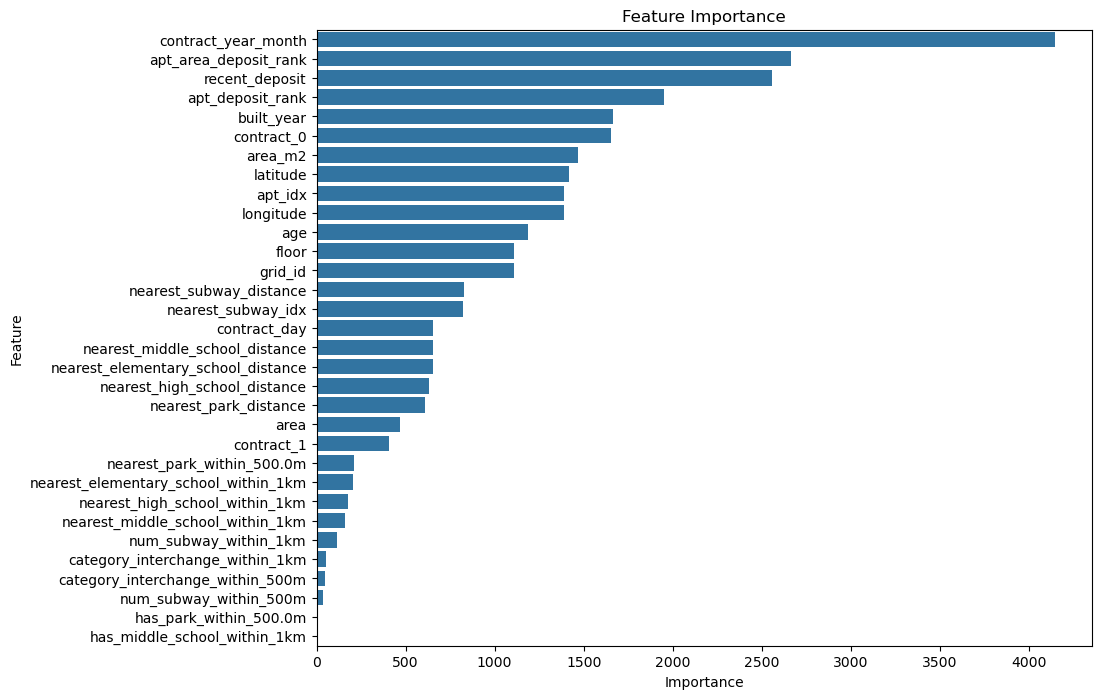

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 피처 중요도 추출
feature_importance = model.get_fscore()
# 피처 중요도를 DataFrame으로 변환
importance_df = pd.DataFrame(feature_importance.items(), columns=['Feature', 'Importance'])
# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [20]:
# 테스트 데이터를 DMatrix로 변환
dtest = xgb.DMatrix(X_test)

# 예측 수행
xgb_test_pred = model.predict(dtest)

# 결과 저장
sample_submission['deposit'] = xgb_test_pred

ValueError: Length of values (141734) does not match length of index (150172)

In [18]:
sample_submission.describe()

,index,deposit
count,150172.00000,150172.000000
mean,75085.50000,39061.113281
std,43351.06665,23880.900391
min,0.00000,3239.269531
25%,37542.75000,23168.781738
50%,75085.50000,33801.119141
75%,112628.25000,48535.195312
max,150171.00000,320368.968750


In [19]:
sample_submission.to_csv('v4_xgboost_add(arima).csv', index=False, encoding='utf-8-sig')

# LightGBM 모델 훈련

In [52]:
lgb_model = lgb.LGBMRegressor(random_state=RANDOM_SEED)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.066484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4146
[LightGBM] [Info] Number of data points in the train set: 1594362, number of used features: 33
[LightGBM] [Info] Start training from score 37814.733261


LGBMRegressor(random_state=42)

# Holdout 데이터셋에 대한 성능 확인

In [53]:
lgb_holdout_pred = lgb_model.predict(X_holdout)
lgb_holdout_mae = mean_absolute_error(y_holdout, lgb_holdout_pred)
print("Holdout 데이터셋 성능:")
print(f"LightGBM MAE: {lgb_holdout_mae:.2f}")

Holdout 데이터셋 성능:
LightGBM MAE: 4006.29


# Sample Submission 제출하기

In [54]:
lgb_test_pred = lgb_model.predict(X_test)
sample_submission['deposit'] = lgb_test_pred
# sample_submission.to_csv('v5_aptrank_LGBM.csv', index=False, encoding='utf-8-sig')

In [55]:
sample_submission.describe()

,index,deposit
count,150172.00000,150172.000000
mean,75085.50000,36662.339767
std,43351.06665,22349.113922
min,0.00000,4529.476416
25%,37542.75000,22481.078127
50%,75085.50000,31579.625395
75%,112628.25000,45075.800814
max,150171.00000,729244.015468
